In [1]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
numpy.random.seed(7)

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [10]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [11]:
print(dataset)

[[ 112.]
 [ 118.]
 [ 132.]
 [ 129.]
 [ 121.]
 [ 135.]
 [ 148.]
 [ 148.]
 [ 136.]
 [ 119.]
 [ 104.]
 [ 118.]
 [ 115.]
 [ 126.]
 [ 141.]
 [ 135.]
 [ 125.]
 [ 149.]
 [ 170.]
 [ 170.]
 [ 158.]
 [ 133.]
 [ 114.]
 [ 140.]
 [ 145.]
 [ 150.]
 [ 178.]
 [ 163.]
 [ 172.]
 [ 178.]
 [ 199.]
 [ 199.]
 [ 184.]
 [ 162.]
 [ 146.]
 [ 166.]
 [ 171.]
 [ 180.]
 [ 193.]
 [ 181.]
 [ 183.]
 [ 218.]
 [ 230.]
 [ 242.]
 [ 209.]
 [ 191.]
 [ 172.]
 [ 194.]
 [ 196.]
 [ 196.]
 [ 236.]
 [ 235.]
 [ 229.]
 [ 243.]
 [ 264.]
 [ 272.]
 [ 237.]
 [ 211.]
 [ 180.]
 [ 201.]
 [ 204.]
 [ 188.]
 [ 235.]
 [ 227.]
 [ 234.]
 [ 264.]
 [ 302.]
 [ 293.]
 [ 259.]
 [ 229.]
 [ 203.]
 [ 229.]
 [ 242.]
 [ 233.]
 [ 267.]
 [ 269.]
 [ 270.]
 [ 315.]
 [ 364.]
 [ 347.]
 [ 312.]
 [ 274.]
 [ 237.]
 [ 278.]
 [ 284.]
 [ 277.]
 [ 317.]
 [ 313.]
 [ 318.]
 [ 374.]
 [ 413.]
 [ 405.]
 [ 355.]
 [ 306.]
 [ 271.]
 [ 306.]
 [ 315.]
 [ 301.]
 [ 356.]
 [ 348.]
 [ 355.]
 [ 422.]
 [ 465.]
 [ 467.]
 [ 404.]
 [ 347.]
 [ 305.]
 [ 336.]
 [ 340.]
 [ 318.]
 [ 362.]
 

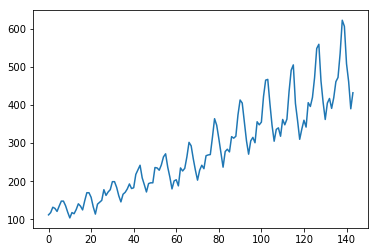

In [12]:
plt.plot(dataset)
plt.show()

In [14]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [15]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))
# print(train)

96 48


In [26]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [27]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [28]:
# create and fit the LSTM network

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
0s - loss: 0.0316 - acc: 0.0106
Epoch 2/100
0s - loss: 0.0142 - acc: 0.0106
Epoch 3/100
0s - loss: 0.0116 - acc: 0.0106
Epoch 4/100
0s - loss: 0.0107 - acc: 0.0106
Epoch 5/100
0s - loss: 0.0098 - acc: 0.0106
Epoch 6/100
0s - loss: 0.0088 - acc: 0.0106
Epoch 7/100
0s - loss: 0.0078 - acc: 0.0106
Epoch 8/100
0s - loss: 0.0069 - acc: 0.0106
Epoch 9/100
0s - loss: 0.0061 - acc: 0.0106
Epoch 10/100
0s - loss: 0.0053 - acc: 0.0106
Epoch 11/100
0s - loss: 0.0047 - acc: 0.0106
Epoch 12/100
0s - loss: 0.0041 - acc: 0.0106
Epoch 13/100
0s - loss: 0.0036 - acc: 0.0106
Epoch 14/100
0s - loss: 0.0032 - acc: 0.0106
Epoch 15/100
0s - loss: 0.0028 - acc: 0.0106
Epoch 16/100
0s - loss: 0.0026 - acc: 0.0106
Epoch 17/100
0s - loss: 0.0024 - acc: 0.0106
Epoch 18/100
0s - loss: 0.0023 - acc: 0.0106
Epoch 19/100
0s - loss: 0.0022 - acc: 0.0106
Epoch 20/100
0s - loss: 0.0021 - acc: 0.0106
Epoch 21/100
0s - loss: 0.0021 - acc: 0.0106
Epoch 22/100
0s - loss: 0.0020 - acc: 0.0106
Epoch 23/100
0s - l

In [19]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [20]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [21]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.93 RMSE
Test Score: 47.53 RMSE


In [22]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [23]:
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

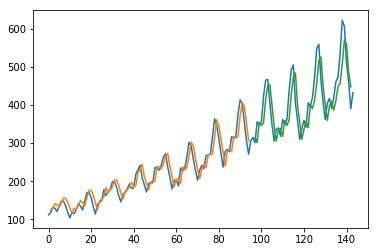

In [24]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()